# Mini projet - Data mining - SDV Rennes 2023

## Objectif
Durant ce mini projet, on va essayer de travailler avec des donn√©es r√©elles.
Il est temps d'appliquer vos comp√©tences acquises pendant cet enseignement dans un mini projet de mod√©lisation d√©cisionnelle √† partir des donn√©es.
L'objectif est de d√©terminer la qualit√© d'un vin √† partir de mesures des composantes chimiques.


## Sujet propos√©
La pr√©diction de la qualit√© (entier entre 0 et 10) du vin √† partir des mesures de ses composantes chimiques.
Pour ce mini projet, je propose d'utiliser ce dataset : http://archive.ics.uci.edu/ml/datasets/Wine+Quality


## R√©f√©rences utiles
- [Documentation scikit-learn](http://scikit-learn.org/stable/index.html)
- [Documentation Pandas](https://pandas.pydata.org/docs)
- [Documentation NumPy](https://docs.scipy.org/doc/numpy/user/index.html)
- [Documentation Matplotlib](http://matplotlib.org/)
- [Documentation Seaborn](https://seaborn.pydata.org/)
- [Dataset wine quality](http://archive.ics.uci.edu/ml/datasets/Wine+Quality)


## D√©roulement
- Pour qu'on soit efficace, et que √ßa soit un mini projet que vous pourriez utiliser comme r√©f√©rence, celui-ci sera guid√©.
Comme √ßa va faire l'objet de la note finale de la partie pratique de l'examen (14 points), vous serez guid√© par des exercices √©tape par √©tape.
- Vous pouvez travailler seul ou en bin√¥me.



## Exercice 1 : Point m√©tier
### Question 1.1 : Objectif
C'est quoi l'objectif de cette mod√©lisation d√©cisionnelle ? Dans la vraie vie, √† ce stade, un point s'impose avec le PO pour clarifier le besoin. Aujourd'hui, vous portez sa casquette ;)  

**R√©ponse** : D√©terminer la qualit√© d'un vin √† partir de ses composants.

## Question 1.2 : M√©thode d√©cisionnelle
Analytiquement, existe-t-il une m√©t6hode qui nous permet de construire un mod√®le d√©cisionnel fiable qui r√©pond √† l'objectif de l'√©tude ? Donnez une r√©ponse logique, si possible avec un lien de r√©f√©rence.

**R√©ponse** : Nous avons une valeur qui oscille entre 0 et 10, ce qui constitue une variable quantitative. Les recherches sur internet ne permettent pas d'identifier une m√©thode math√©matique pr√©d√©finie pour estimer cette valeur bien qu'un ensemble de crit√®res sont n√©cessaires pour cette estimation d'apr√®s [cet article](https://macaonews.org/fooddrinks/wine-tasting-essentials-part-1-how-to-inspect-a-wine-by-sight/). Parmis les m√©thodes factorielles, la m√©thode AFD ne constitue pas une m√©thode ad√©quate puisqu'elle est utilis√©e dans le cadre de l'analyse d'une variable qualitative, ou classification. **Nous allons donc nous orienter vers l'ACP pour r√©aliser cette mod√©lisation d√©cisionnelle puisqu'elle est la m√©thode d'estimation de variables continues**. Le reste du projet, on va adopter le choix d'appliquer une mod√©lisation d√©cisionnelle √† partir des don√©es.  


**EDIT** : *LORS DE NOTRE MODELISATION, NOUS NOUS SOMMES RENDU COMPTE QUE LES TECHNIQUES DE MOD√âLISATIONS POUR ESTIMER DES VARIABLES QUALITATIVES NE FONCTIONNENT PAS. EN CE SENS, NOUS NOUS SOMMES CONCENTR√â SUR LA MOD√âLISATION DE VARIABLE QUALITATIVES. LA VARIABLE QUALITY SERAIT ALORS UNE VALEUR CATEGORIELLE, AU M√äME TITRE QUE LE TYPE DE VIN*


## Exercice 2 : Chargement des donn√©es
### Question 2.1 : Cr√©ation du dataset
T√©l√©charger les 2 fichiers `winequality-red.csv` et `winequality-white.csv` depuis [ce lien](http://archive.ics.uci.edu/ml/datasets/Wine+Quality)
Former votre dataset √† partir des 2 fichiers d√©j√† t√©l√©charg√©s.
Afficher les 3 premi√®res lignes du dataset.

In [26]:
import pandas as pd

In [27]:
winequality_red = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
winequality_white = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

df_red = pd.read_csv(winequality_red, sep=';')
type_wine = ["white", "red"]
# Ajoute une colonne "type_wine" √† df_red
df_red['type_wine'] = type_wine[1]
df_white = pd.read_csv(winequality_white, sep=';')
# Ajoute une colonne "type_wine" √† df_white
df_white['type_wine'] = type_wine[0]
# Concatenate red and white wine data into a single DataFrame
df = pd.concat([df_red, df_white])
df.head(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality type_wine  
0      9.4        5       red  
1      9.8        5       red  
2      9.8        5       red

### Question 2.2 : Confirmation du choix du dataset
- Existe-t-il une diff√©rence entre les vins rouges et vins blancs en terme de qualit√© ?
- Pour r√©pondre √† cette question, tracer une courbe qui groupe les donn√©es suivant le type du vin.
- Sur le m√™me graphique, mettez l'accent sur la qualit√©.
- Commenter le graphique ?

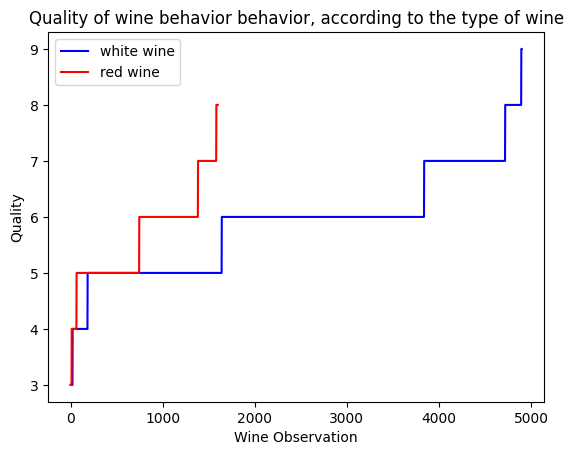

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_white.sort_values(by = "quality", inplace = True)
df_red.sort_values(by = "quality", inplace = True)
sns.lineplot(x=list(range(len(df_white))), y=df_white["quality"], data = df_white, color = "blue", label = "white wine")
sns.lineplot(x=list(range(len(df_red))), y=df_red["quality"], data = df_red, color = "red", label = "red wine")
plt.title("Quality of wine behavior behavior, according to the type of wine")
plt.xlabel("Wine Observation")
plt.ylabel("Quality")
plt.show()

### REALISATION DU GRAPHIQUE
1. Trier les datasets par qualit√© du vin.
2. Tracer une courbe qui montre le comportement de la qualit√© du vin en fonction du type de vin. 

### COMMENTAIRE DU GRAPHIQUE

En abscisses, on retrouve l'observation du vin.  
En ordonn√©es, on retrouve la qualit√© du vin.  

On peut observer que les vins blancs ont une qualit√© maximale sup√©rieure aux vins rouges.  
Cependant, le nombre de vins rouges √©tant inf√©rieures √† celui des vins blancs ne permet pas de l'affirmer.

## Exercice 3 : Analyse exploratoire
**NB:** Pour le reste du projet, on va travailler avec le dataset form√© par les vins rouges et blancs.


### Question 3.1 : Etat des lieux
- Afficher la description puis les informations du dataset
- Quel est le nombre d'observations qu'on a dans le dataset ?
- Combien de variables poss√®de le dataset ?
>- Combien de variables continues ?
>- Combien de variables qualitatives ?

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type_wine             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


### COMMENTAIRE DE df.info()
Le dataset issu de la fusion des datasets des vins rouges et des vins blancs.  
Le dataset est consitu√© de 6497 observations.  
Le dataset poss√®de 13 variables dont la variable √† expliquer, quality. Il y a √©galement une variable cr√©√©e, type_wine, qui est le type de vin . Parmis ces variables, nous retrouvons 12 variables continues et une variable qualitative.

### Question 3.2 : Variables
- Quelles sont les variables explicatives ?
- Quelle est la variable expliqu√©e ?

La variable expliqu√©e est quality.  
Les autres variables sont les variables explicatives, sauf type_wine.

---

### Question 3.3 : Variables qualitatives
- Appliquez une transformation sur les variables qualitatives.

### Label Encoder

In [30]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_labencod = df.copy()
df_labencod['type_wine_labencod'] = le.fit_transform(df['type_wine'])
df_labencod.drop("type_wine", axis = 1, inplace = True)
df_labencod.head(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  type_wine_labencod  
0      9.4        5                   0  
1      9.8        5                   0  
2      9.8        5                   0

### One-Hot

In [31]:
dummies_wine = pd.get_dummies(df["type_wine"])
df_onehotencod = pd.concat([df, dummies_wine], axis = 1)
df_onehotencod.drop("type_wine", axis = 1, inplace = True)
df_onehotencod.head(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  red  white  
0      9.4        5    1      0  
1      9.8        5    1      0  
2      9.8        5    1      0

### COMMENTAIRE
Nous avons fait deux datasets pour **confronter les deux techniques d'encoding** : Label encoding vs One Hot

---

### Question 3.4 : V√©rification des donn√©es manquantes
- Effectuez une v√©rification sur les donn√©es manquantes.
- Combien d'individus pr√©sentent des donn√©es manquantes ?

In [32]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_wine               0
dtype: int64

### Observations  
On peut voir qu'il n'y a aucune donn√©es manquantes.  
On l'avait d√©j√† identifi√© dans la question 3.1 avec le df.info().

---

### Question 3.5 : Imputation des donn√©es manquantes
- En dehors du contexte de ce projet, proposez une m√©thode pour imputer des donn√©es manquantes.
- Pour ce projet, quelle m√©thode proposez-vous pour imputer des donn√©es manquantes ?
- Que fa√Ætes-vous dans le cas o√π on a des donn√©es manquantes dans la colonne de la variable expliqu√©e ?

### R√©ponse
- En dehors du contexte de ce projet, on propose d'appliquer la m√©thode de la moyenne.  
- Pour ce projet, on propose d'appliquer la m√©thode de la moyenne par type de vin.  
- Dans le cas o√π on a des donn√©es manquantes dans la colonne de la variable expliqu√©e, on propose de supprimer les observations qui pr√©sentent des donn√©es manquantes.

---

### Question 3.6 : Analyse du nombre des observations par qualit√©
- Proposez un graphique afin de visualiser le nombre d'observations par qualit√©.
- Commentez ce graphique.

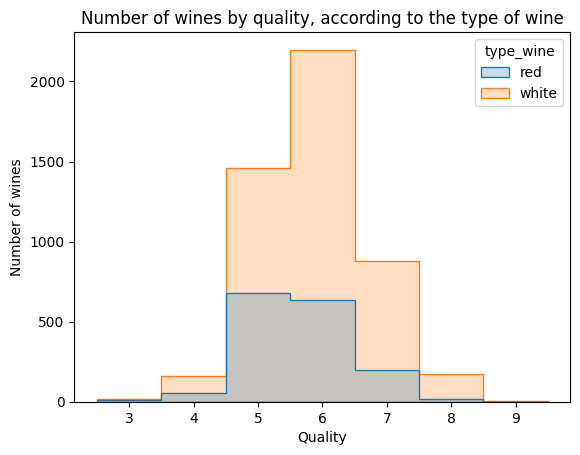

In [33]:
sns.histplot(data = df, x = df["quality"], hue = "type_wine", stat = "count", discrete = True, element = "step")
plt.title("Number of wines by quality, according to the type of wine")
plt.xlabel("Quality")
plt.ylabel("Number of wines")
plt.show()

### Question 3.7 : Analyse de la corr√©lation
- Proposer un graphique qui met en √©vidence la corr√©lation entre les diff√©rentes variables.
- Commenter ce graphique.

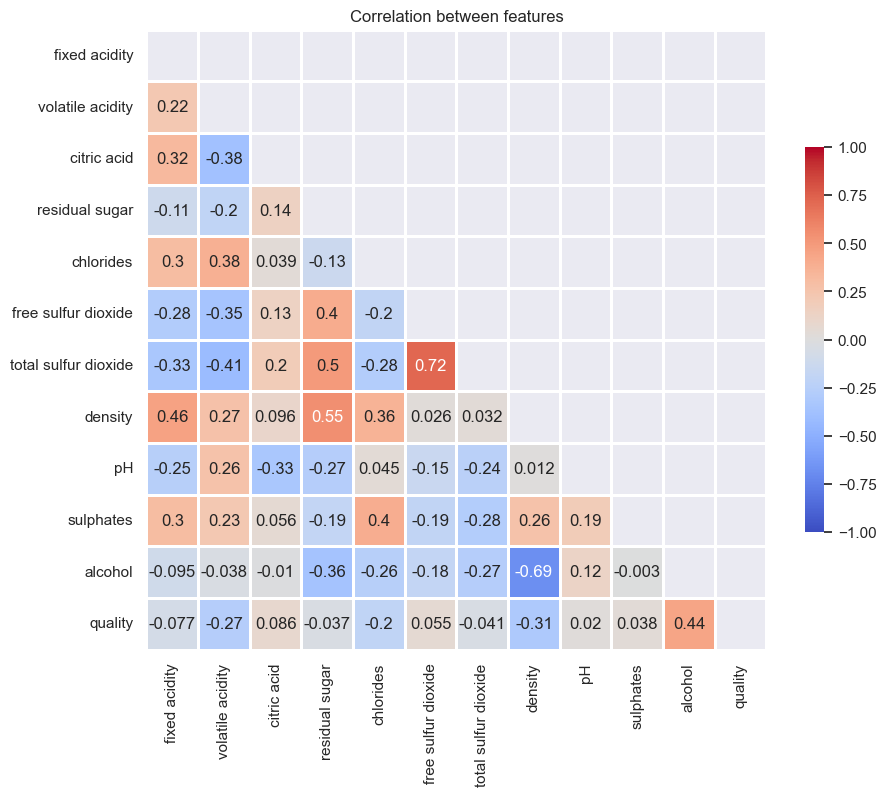

In [34]:
import numpy as np
df_corr = df.drop("type_wine", axis = 1)
corr = df_corr.corr()
plt.figure(figsize = (10, 10))
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot = True, cmap = "coolwarm",mask=mask, vmin = -1, vmax = 1, center = 0, square = True, linewidths = 1, cbar_kws = {"shrink": 0.5})
plt.title("Correlation between features")
plt.show()

### BONUS : HEATMAP 3D

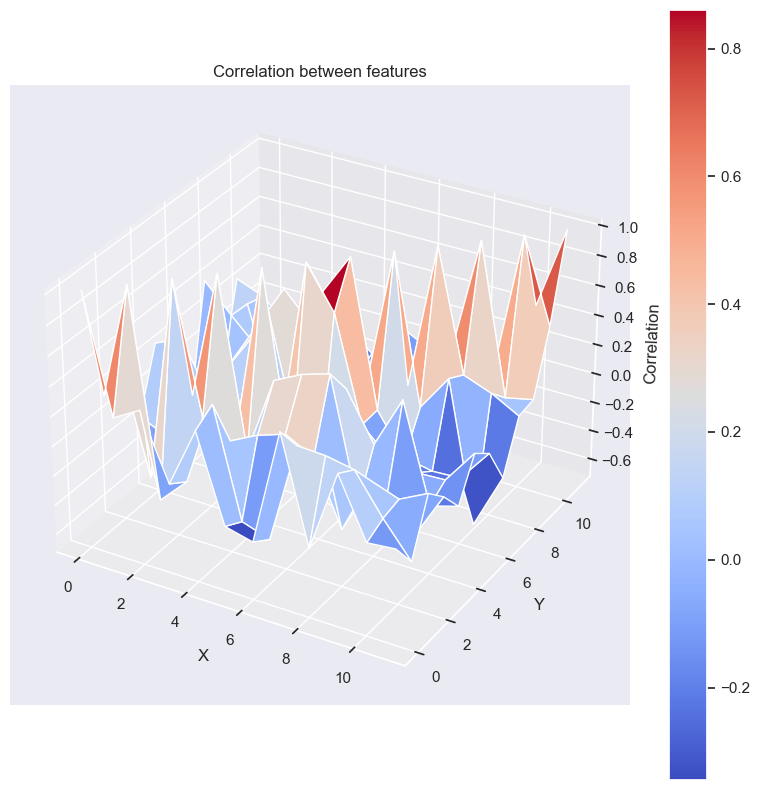

In [35]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Use the `%matplotlib notebook` magic command to enable interactive features

df_corr = df.drop("type_wine", axis = 1)
corr = df_corr.corr()

# Generate coordinates for the heatmap
X, Y = np.meshgrid(np.arange(corr.shape[0]), np.arange(corr.shape[1]))

# Get the values to be plotted
Z = corr.values

# Create a Figure and an Axes3D object
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='coolwarm')

# Add a colorbar
ax.figure.colorbar(ax.collections[0])

# Set the labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Correlation')
plt.title("Correlation between features")

plt.show()

### Question 3.8 : Fractionnement en Features X et Target y
- Fractionnez votre dataset en deux parties : `X` pour les features et `y` pour la variable cible.

### Label Encoder

In [36]:
df_labencod.head(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  type_wine_labencod  
0      9.4        5                   0  
1      9.8        5                   0  
2      9.8        5                   0

In [37]:
# D√©coupage pour X
X_labencod = df_labencod.drop("quality", axis = 1)
X_labencod.head(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  type_wine_labencod  
0      9.4                   0  
1      9.8                   0  
2      9.8                   0

In [38]:
# D√©coupage pour y
y_labencod = df_labencod["quality"]
y_labencod.head(3)

0    5
1    5
2    5
Name: quality, dtype: int64

### One Hot Encoder

In [39]:
X_onehotencod = df_onehotencod.drop("quality", axis = 1)
X_onehotencod.head(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  red  white  
0      9.4    1      0  
1      9.8    1      0  
2      9.8    1      0

In [40]:
y_onehotencod = df_onehotencod["quality"]
y_onehotencod.head(3)

0    5
1    5
2    5
Name: quality, dtype: int64

### Question 3.9 : Split en subsets de Train et Test
- Formez les subsets d'entra√Ænement (2/3) et de test (1/3)

In [41]:
from sklearn.model_selection import train_test_split

### Label Encoder

In [42]:
X_labencod_train, X_labencod_test, y_labencod_train, y_labencod_test = train_test_split(X_labencod, y_labencod, test_size = 1/3, random_state = 42)

### One Hot Encoder

In [43]:
X_onehotencod_train, X_onehotencode_test, y_onehotencod_train, y_onehotencod_test = train_test_split(X_onehotencod, y_onehotencod, test_size = 1/3, random_state = 42)

### Question 3.10 : R√©duction des variables
- Avec vos propres mots, expliquez pourquoi on cherche √† r√©duire le nombre des variables ?
- Appliquez une m√©thode de r√©duction de variables par s√©lection.
- Quelles sont les meilleures variables s√©lectionn√©es ? Expliquez cette s√©lection.
- D√©terminez les nouveaux subsets des variables explicatives (`X_train_best` et `X_test_best`) apr√®s filtrage.
- Affichez les dimensions de `X_train_best` et `X_train`

In [44]:
from sklearn.feature_selection import VarianceThreshold

### Label Encoder

In [45]:
# Tout d'abord, nous allons calculer les variances pour estimer un seuil √† donner au VarianceTreshold
import statistics
for col_name in list(X_labencod_train.columns):
  print(f"variance de {col_name} = {statistics.variance(X_labencod_train[col_name]):.2f}")

variance de fixed acidity = 1.65
variance de volatile acidity = 0.03
variance de citric acid = 0.02
variance de residual sugar = 23.02
variance de chlorides = 0.00
variance de free sulfur dioxide = 304.34
variance de total sulfur dioxide = 3110.25
variance de density = 0.00
variance de pH = 0.03
variance de sulphates = 0.02
variance de alcohol = 1.43
variance de type_wine_labencod = 0.18


**Commentaire** : nous choisissons comme seuil (threshold), 20.

In [46]:
threshold_labencod = 20
selector_labencod = VarianceThreshold(threshold=threshold_labencod)
selector_labencod.fit_transform(X_labencod_train)

# Nom des colonnes √† garder
col_keep_labencod = selector_labencod.get_feature_names_out()

print(col_keep_labencod)

['residual sugar' 'free sulfur dioxide' 'total sulfur dioxide']


In [47]:
X_thresh20_train_best = X_labencod_train.loc[::, [col_name for col_name in list(X_labencod_train.columns) if col_name in col_keep_labencod]]
X_thresh20_train_best.head(3)

residual sugar  free sulfur dioxide  total sulfur dioxide
1364             1.1                 38.0                 143.0
89              11.8                 52.0                 152.0
745              2.1                 12.0                  28.0

### One Hot Encoder

In [48]:
for col_name in list(X_onehotencod_train.columns):
  print(f"variance de {col_name} = {statistics.variance(X_onehotencod_train[col_name]):.2f}")

variance de fixed acidity = 1.65
variance de volatile acidity = 0.03
variance de citric acid = 0.02
variance de residual sugar = 23.02
variance de chlorides = 0.00
variance de free sulfur dioxide = 304.34
variance de total sulfur dioxide = 3110.25
variance de density = 0.00
variance de pH = 0.03
variance de sulphates = 0.02
variance de alcohol = 1.43
variance de red = 0.18
variance de white = 0.18


**Commentaire** : Nous constatons que les deux mani√®res d'encoder le type de vin n'induit pas de variances significatives (0.18 avec le Label Encoder et 0.19, deux fois, avec le One hot Encoder). De ce fait, en gardant la m√™me threshold, cela va avoir le m√™me traitement sur les jeux de donn√©es qui ont pourtant des colonnes diff√©rentes pour l'encoding du type de vin (Nous allons avoir les m√™mes variables √† garder en sortie). Ainsi, pour forcer un changement dans l'estimation du mod√®le (ce qui √©tait attendu lors de l'utilisation de deux encodeurs), nous faisons le choix de changer le threshold pour le One Hot Encoder, nous permettant de garder plus de variables que pour Label Encoder, sans s√©lectionner les variables issues de l'encodage du type de vin, quelque soit la m√©thode.

In [49]:
# Nous choissons un seuil de 0
threshold_onehotencod = 0
selector_onehotencod = VarianceThreshold(threshold=threshold_onehotencod)
selector_onehotencod.fit_transform(X_onehotencod_train)
col_keep_onehot = selector_onehotencod.get_feature_names_out()
print(col_keep_onehot)

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'red' 'white']


In [50]:
X_thresh0_train_best = X_onehotencod_train.loc[::, [col_name for col_name in list(X_onehotencod_train.columns) if col_name in col_keep_onehot]]
X_thresh0_train_best.head(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1364            7.6              0.19         0.41             1.1      0.040   
89              7.1              0.44         0.62            11.8      0.044   
745             7.3              0.51         0.18             2.1      0.070   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1364                 38.0                 143.0  0.99070  2.92       0.42   
89                   52.0                 152.0  0.99750  3.12       0.46   
745                  12.0                  28.0  0.99768  3.52       0.73   

      alcohol  red  white  
1364     11.4    0      1  
89        8.7    0      1  
745       9.5    1      0

### R√©ponse

La r√©duction des variables permet de r√©duire le nombre de variables √† traiter sans supprimer les informations utiles (les variables qui expliquent le mieux la target), qui permet de diminuer le probl√®me de fl√©au de la dimension. De plus, cela va permettre de supprimer le bruit.

### Question 3.11 :  Distribution des 4 meilleurs variables explicatives
- Proposer sur la m√™me figure 4 graphiques qui mettent en √©vidence la distribution des 4 meilleures variables s√©lectionn√©es par filtrage.
- Que remarquez-vous ? Peut-on mieux optimiser les donn√©es d'entr√©e ?

### Threshold_variance = 20

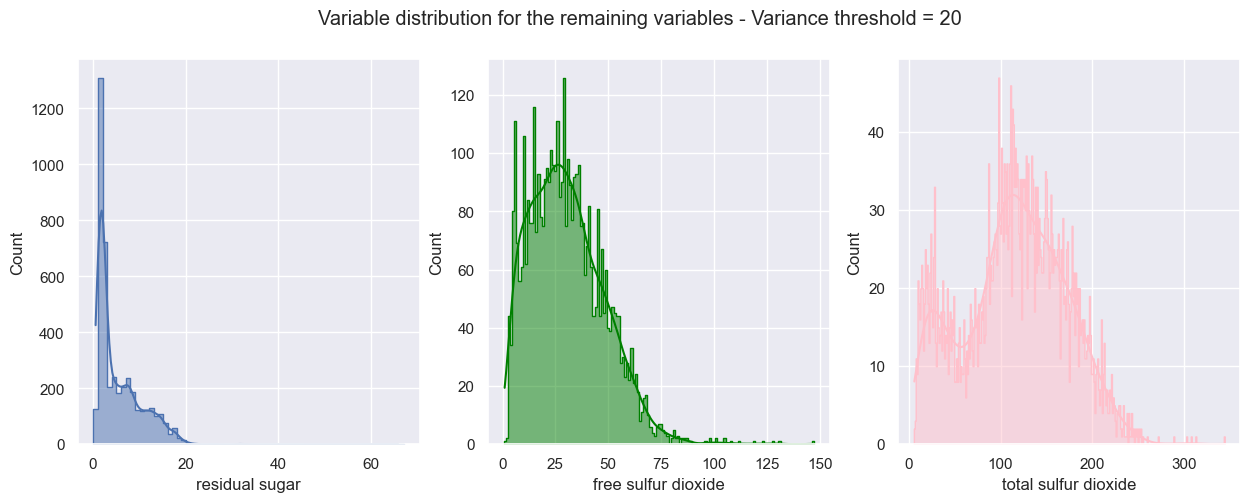

In [51]:
fig, axes = plt.subplots(1,3, figsize = [15,5])
sns.histplot(ax = axes[0], data = X_thresh20_train_best, x = "residual sugar", stat = "count", discrete = True, element = "step", kde = True)
sns.histplot(ax = axes[1], data = X_thresh20_train_best, x = "free sulfur dioxide", stat = "count", discrete = True, element = "step", color = "green", kde = True)
sns.histplot(ax = axes[2], data = X_thresh20_train_best, x = "total sulfur dioxide", stat = "count", discrete = True, element = "step", color = "pink", kde = True)
plt.suptitle("Variable distribution for the remaining variables - Variance threshold = 20")
plt.show()

### Threshold variance = 0

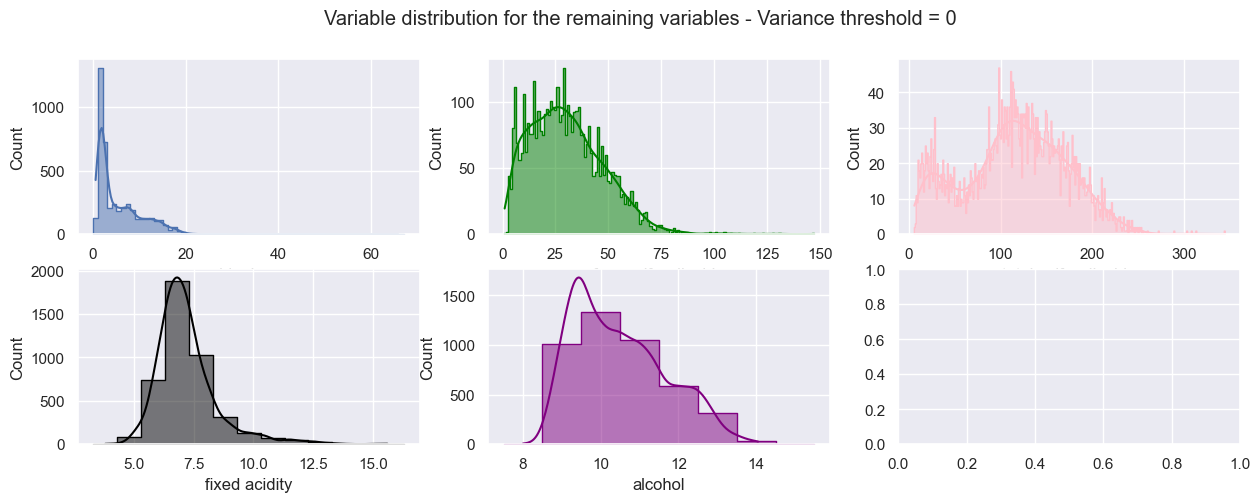

In [52]:
fig, axes = plt.subplots(2,3, figsize = [15,5])
sns.histplot(ax = axes[0,0], data = X_thresh0_train_best, x = "residual sugar", stat = "count", discrete = True, element = "step", kde = True)
sns.histplot(ax = axes[0,1], data = X_thresh0_train_best, x = "free sulfur dioxide", stat = "count", discrete = True, element = "step", color = "green", kde = True)
sns.histplot(ax = axes[0,2], data = X_thresh0_train_best, x = "total sulfur dioxide", stat = "count", discrete = True, element = "step", color = "pink", kde = True)
sns.histplot(ax = axes[1,0], data = X_thresh0_train_best, x = "fixed acidity", stat = "count", discrete = True, element = "step", color = "black", kde = True)
sns.histplot(ax = axes[1,1], data = X_thresh0_train_best, x = "alcohol", stat = "count", discrete = True, element = "step", color = "purple", kde = True)
plt.suptitle("Variable distribution for the remaining variables - Variance threshold = 0")
plt.show()

## Exercice 4 : Mod√©lisation
### Question 4.1 : Remise √† l'√©chelle
- D√©crivez les distributions des diff√©rentes variables explicatives.
- Est-il n√©cessaire de mettre √† l'√©chelle les donn√©es du dataset ? Justifiez votre r√©ponse. Si c'est le cas faites-le.

### R√©ponse
- 
- Oui, il est n√©cessaire de mettre √† l'√©chelle les donn√©es du dataset. En effet, les variables explicatives ne sont pas toutes sur la m√™me √©chelle. Certaines variables ont des valeurs tr√®s √©lev√©es (free sulfur dioxide, total sulfur dioxide, residual sugar) alors que d'autres ont des valeurs tr√®s faibles (volatile acidity, citric acid, etc.). Il est donc n√©cessaire de mettre √† l'√©chelle les donn√©es du dataset pour pouvoir les comparer correctement.

### Threshold variance = 20

In [53]:
print(col_keep_labencod) # Pour Threshold variance = 20

['residual sugar' 'free sulfur dioxide' 'total sulfur dioxide']


In [54]:
X_l1_normalize_20train_array = preprocessing.normalize(X_thresh20_train_best, norm='l1')
X_l2_normalize_20train_array = preprocessing.normalize(X_thresh20_train_best, norm='l2')

X_l1_normalize_20train = pd.DataFrame(X_l1_normalize_20train_array, columns = col_keep_labencod)

X_l2_normalize_20train = pd.DataFrame(X_l1_normalize_20train_array, columns = col_keep_labencod)
print(X_l2_normalize_20train.head(3))

   residual sugar  free sulfur dioxide  total sulfur dioxide
0        0.006041             0.208677              0.785283
1        0.054680             0.240964              0.704356
2        0.049881             0.285036              0.665083


### Threshold variance = 0

In [55]:
X_l1_normalize_0train_array = preprocessing.normalize(X_thresh0_train_best, norm='l1')
X_l2_normalize_0train_array = preprocessing.normalize(X_thresh0_train_best, norm='l2')

X_l1_normalize_0train = pd.DataFrame(X_l1_normalize_0train_array, columns = col_keep_onehot)
X_l2_normalize_0train = pd.DataFrame(X_l2_normalize_0train_array, columns = col_keep_onehot)
print(X_l2_normalize_0train.head(3))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.051131          0.001278     0.002758        0.007401   0.000269   
1       0.043960          0.002724     0.003839        0.073060   0.000272   
2       0.220992          0.015439     0.005449        0.063573   0.002119   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.255657              0.962078  0.006665  0.019645   0.002826   
1             0.321959              0.941111  0.006176  0.019318   0.002848   
2             0.363275              0.847642  0.030203  0.106561   0.022099   

    alcohol       red     white  
0  0.076697  0.000000  0.006728  
1  0.053866  0.000000  0.006192  
2  0.287593  0.030273  0.000000  


### Question 4.2 : Cr√©ation du mod√®le
- Choisissez un mod√®le sklearn pour l'entrainer et cr√©er le votre. [Documentation](https://scikit-learn.org/stable/supervised_learning.html)
- Exemples:
>- Pour une classification, vous pouvez utiliser l'un de ces mod√®les: [RidgeClassifier](https://scikit-learn.org/stable/modules/linear_model.html#classification), [SVC](https://scikit-learn.org/stable/modules/svm.html#classification), [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/tree.html#classification)
>- Pour une r√©gression, vous pouvez utiliser l'un de ces mod√®les: [SVR](https://scikit-learn.org/stable/modules/svm.html#regression), [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/tree.html#regression)

### Threshold variance = 20

In [56]:
X_thresh20_test_raw = X_labencod_test.loc[::, [col_name for col_name in list(X_labencod_test.columns) if col_name in col_keep_labencod]] # Extraction 
X_l1_normalize_20test_array = preprocessing.normalize(X_thresh20_test_raw, norm='l1')
X_l2_normalize_20test_array = preprocessing.normalize(X_thresh20_test_raw, norm='l2')

X_l1_normalize_20test = pd.DataFrame(X_l1_normalize_20test_array, columns = col_keep_labencod) # NORMALIZATION L1
X_l2_normalize_20test = pd.DataFrame(X_l2_normalize_20test_array, columns = col_keep_labencod) # NORMALIZATION L2

In [57]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn import svm
from sklearn import tree
# model = LinearDiscriminantAnalysis() # Moyen, pas ouf. 0.45
# model = svm.SVR() # Nul √† chier. 0.00
# model = svm.SVC() # Moyen, pas ouf. 0.45
# model = svm.LinearSVC() # Moyen, pas ouf. 0.46
model = tree.DecisionTreeClassifier() # Moyen. 0.51
# model = tree.DecisionTreeRegressor() # NEGATIF
# from sklearn.linear_model import Perceptron # Moyen. 0.31
# model = Perceptron(tol=1e-3, random_state=0)
# from sklearn.multiclass import OutputCodeClassifier # 0.46
# from sklearn.svm import LinearSVC # 0.46
# model = OutputCodeClassifier(LinearSVC(random_state=0),code_size=2, random_state=0) # 0.46
# from sklearn.naive_bayes import CategoricalNB # 0.45
# model = CategoricalNB() 
# from sklearn.neural_network import MLPClassifier # 0.45
# model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

# ENTRAINEMENT ET SCORING AVEC L1
model_t20_l1 = model.fit(X_l1_normalize_20train, y_labencod_train) # Entrainement
score_t20_l1 = model_t20_l1.score(X_l1_normalize_20test, y_labencod_test)

# ENTRAINEMENT ET SCORING AVEC L2
model_t20_l2 = model.fit(X_l2_normalize_20train, y_labencod_train) # Entrainement
score_t20_l2 = model_t20_l2.score(X_l2_normalize_20test, y_labencod_test)

### Threshold variance = 0

In [58]:
X_thresh0_test_raw = X_onehotencode_test.loc[::, [col_name for col_name in list(X_onehotencode_test.columns) if col_name in col_keep_onehot]] # Extraction 
X_l1_normalize_0test_array = preprocessing.normalize(X_thresh0_test_raw, norm='l1')
X_l2_normalize_0test_array = preprocessing.normalize(X_thresh0_test_raw, norm='l2')

X_l1_normalize_0test = pd.DataFrame(X_l1_normalize_0test_array, columns = col_keep_onehot) # NORMALIZATION L1
X_l2_normalize_0test = pd.DataFrame(X_l2_normalize_0test_array, columns = col_keep_onehot) # NORMALIZATION L2

### Liste des r√©sultats par mod√®le

- **Mod√®le** : LinearDiscriminantAnalysis :
    - Score t20 L1 : 0.51
    - Score t20 L2 : 0.07
    - Score t0 L1 : 0.50
    - Score t0 L2 : 0.49
- **Mod√®le** : svm.SVR : 
    - Score t20 L1 : 0.51
    - Score t20 L2 : 0.07
    - Score t0 L1 : 0.12
    - Score t0 L2 : 0.11
- **Mod√®le** : svm.SVC : 
    - Score t20 L1 : 0.51
    - Score t20 L2 : 0.07
    - Score t0 L1 : 0.46
    - Score t0 L2 : 0.46
- **Mod√®le** : svm.LinearSVC : 
    - Score t20 L1 : 0.51
    - Score t20 L2 : 0.07
    - Score t0 L1 : 0.48
    - Score t0 L2 : 0.49
- **Mod√®le** : tree.DecisionTreeClassifier : 
    - Score t20 L1 : 0.51
    - Score t20 L2 : 0.07
    - Score t0 L1 : 0.58
    - Score t0 L2 : 0.56
- **Mod√®le** : tree.DecisionTreeRegressor : 
    - Score t20 L1 : 0.51
    - Score t20 L2 : 0.07
    - Score t0 L1 : -0.01
    - Score t0 L2 : -0.06
- **Mod√®le** : sklearn.multiclass.OutputCodeClassifier & sklearn.svm.LinearSVC : 
    - Score t20 L1 : 0.51
    - Score t20 L2 : 0.07
    - Score t0 L1 : 0.47
    - Score t0 L2 : 0.48  

En conclusion, le meilleur mod√®le est le **tree.DecisionTreeClassifier** avec un score de 0.58 pour le threshold variance = 0 et une normalisation L1.

In [75]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn import svm
from sklearn import tree
# model = LinearDiscriminantAnalysis()
# model = svm.SVR() #Nul √† chier. 0.1
# model = svm.SVC() # Moyen, pas ouf. 0.46
# model = svm.LinearSVC() # Moyen, pas ouf. 0.47
model = tree.DecisionTreeClassifier() # Moyen. 0.583
# model = tree.DecisionTreeRegressor() # NEGATIF
# from sklearn.multiclass import OutputCodeClassifier # 0.46
# from sklearn.svm import LinearSVC # 0.46
# model = OutputCodeClassifier(LinearSVC(random_state=0),code_size=2, random_state=0) # 0.479
# from auto-sklearn import AutoSklearnClassifier
# model = AutoSklearnClassifier(time_left_for_this_task=2*60, per_run_time_limit=30, n_jobs=8)
# ENTRAINEMENT ET SCORING AVEC L1
model_t0_l1 = model.fit(X_l1_normalize_0train, y_onehotencod_train) # Entrainement
score_t0_l1 = model_t0_l1.score(X_l1_normalize_0test, y_onehotencod_test)

# ENTRAINEMENT ET SCORING AVEC L2
model_t0_l2 = model.fit(X_l2_normalize_0train, y_onehotencod_train) # Entrainement
score_t0_l2 = model_t0_l2.score(X_l2_normalize_0test, y_onehotencod_test)

### Question 4.3 : Evaluation du mod√®le
- Calculez la pr√©cision du score sur le subset d'entrainement puis sur le subset de test

In [76]:
print("== SUBSETS DE TEST ==")
print(f"Score t20 L1 : {score_t20_l1:.2f}")
print(f"Score t20 L2 : {score_t20_l2:.2f}")
print(f"Score t0 L1 : {score_t0_l1:.2f}")
print(f"Score t0 L2 : {score_t0_l2:.2f}")

== SUBSETS DE TEST ==
Score t20 L1 : 0.51
Score t20 L2 : 0.07
Score t0 L1 : 0.58
Score t0 L2 : 0.57


---

### Question 4.4 : Optimisation du r√©sultat
- Pourriez-vous proposer une m√©thode qui optimise plus encore la pr√©cision du mod√®le s√©lectionn√© ?
- Pourriez-vous proposer une m√©thode qui permet de d√©terminer le meilleur mod√®le parmi une liste d√©finie de mod√®les ?

Pour optimiser le mod√®le, Nous conseillons d'avoir **plus de variables explicatives** pour augmenter le nombre d'informations utiles. De plus, il serait int√©ressant d'avoir un **jeu de donn√©e √©quitable** entre le nombre de vin dits "rouge" et dits "blancs", puisque lors du split du dataset, les jeux de donn√©es ne sont pas √©quilibr√©s, avec plus de vins blancs puisque leur pr√©sence est plus grande que celle des rouges.  
Concernant la m√©thode de d√©termination du meilleur mod√®le parmi une liste d√©finie de mod√®le, il existe des m√©thodes comme **le grid search** qui va tester un nombre de param√®tres pour chaque mod√®le, selon la grille de param√®tre que l'on d√©finiera.

---

### Question 4.5 : Pr√©diction
Pr√©dire la qualit√© du vin (rouge) dont les composants chimiques sont les suivantss:
`
'fixed acidity': 7,
'volatile acidity': 0.7,
'citric acid': 0,
'residual sugar': 2,
'chlorides': 0.1,
'free sulfur dioxide': 13,
'total sulfur dioxide': 40,
'density': 0.99,
'pH': 3.5,
'sulphates': 0.6,
'alcohol': 9.5
`

In [63]:
# Nous allons utiliser le mod√®le entrain√© avec un threshold de 1 et une normalisation l1
predict_this = {'fixed acidity': [7],
'volatile acidity': [0.7],
'citric acid': [0],
'residual sugar': [2],
'chlorides': [0.1],
'free sulfur dioxide': [13],
'total sulfur dioxide': [40],
'density': [0.99],
'pH': [3.5],
'sulphates': [0.6],
'alcohol': [9.5],
'type wine' : ['red']}

def predict_wine_quality(wine_input : dict, col_keep : list, model):
    """
    Predict the wine quality based on inputs
    """
    wine_red = [1 if item == 'red' else 0 for item in wine_input['type wine']]
    wine_white = [1 if item == 'white' else 0 for item in wine_input['type wine']]
    data_df_raw = pd.DataFrame.from_dict(wine_input)
    data_df_raw['red'] = wine_red
    data_df_raw['white'] = wine_white
    
    data_df_filter = data_df_raw.loc[::, [col_name for col_name in list(data_df_raw.columns) if col_name in col_keep]]
    data_array_l1 = preprocessing.normalize(data_df_filter, norm='l1')
    data_df_l1 = pd.DataFrame(data_array_l1, columns = col_keep)

    # Run prediction
    quality_prediction = {'quality' : list(model.predict(data_array_l1))}
    return quality_prediction


In [64]:
quality_predicted = predict_wine_quality(wine_input = predict_this, col_keep = col_keep_onehot, model = model_t0_l1)
print(quality_predicted)

{'quality': [5.228449099367111]}


c:\Users\leo49\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


---

### Question 4.6 : Sauvegarde du mod√®le
- Exporter le mod√®le dans un format utilisable par une api externe.

In [ ]:
import pickle
# save the model to disk
filename = 'model_t0_l1.sav'
pickle.dump(model_t0_l1, open(filename, 'wb'))

## Exercice 5 : Utilisation externe du mod√®le
- Avec une techno de votre choix, d√©veloppez une api qui utilise le mod√®le d√©j√† export√© dans la question 4.6.

lien vers le fichier : [predict_quality_api](./predict_quality_api.py)  
lien vers la documentation : [documentation](./readme.md)

# Auteur
- [Mohamed ZWAWA](https://www.linkedin.com/in/mtzwawa)

For more content, follow :  
üëë @iziatask on üê¶ Twitter  
üëë @BeguinKyllian on üê¶ Twitter